<a href="https://colab.research.google.com/github/IshmaelRogers/DeepLearning/blob/master/Copy_of_Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```


```

# Imports

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
#importing necessary libraries to process and plot the data
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support



#Load Data


In [77]:
#loading the data using pandas defining the column names based on the data set
column_names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
                'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
                'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

data = pd.read_csv('/breast-cancer-wisconsin.data.txt', names=column_names, na_values='?')


#Dropping rows with missing data


In [78]:
#use pandas to drope rows with missing values
data = data.dropna()

#standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(['id', 'class'], axis=1))
y = data['class'].values

#Data Split

In [79]:
#Use sklearn to split the data into training and testing
#test_size and random_size are detemined based on the assignment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)


In [80]:
#the explainer document shows how the data is encoded
#so I reencode the labels to 0-Bengin 1- cancer
y_train = np.where(y_train == 2, 0, 1)
y_test = np.where(y_test == 2, 0, 1)


Rencode

# Check Distribution

In [81]:
#show the distribution of labels and verifying correct labels
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

{0: 39, 1: 30}


# Model

In [82]:
#instantiate the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#Train the model


In [ ]:
#train the model using the model.fit function started
#the epocs at 50
#batch size at 32
#increase and decreased batch_size by +/- 16
#increased and decreased epochs by +/- 25
#these parameters produced the best results
history = model.fit(X_train, y_train, epochs=75, batch_size=16, validation_split=0.1 )


#Evaluate

In [88]:
#evaluate the model and return the loss from the test data
#and accuracy from the test data
test_loss, test_acc = model.evaluate(X_test, y_test)


print('\nTest accuracy x 100% = ', test_acc*100)


3/3 [==============================] - 0s 8ms/step - loss: 0.0734 - accuracy: 0.9855

Test accuracy x 100% =  98.55072498321533


Histogram

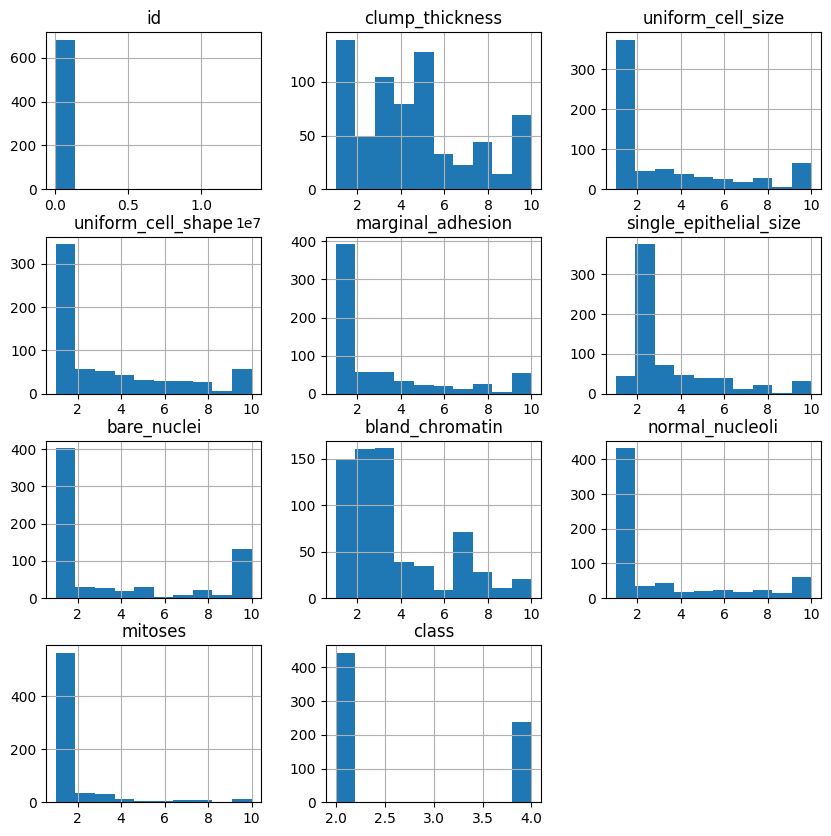

In [89]:
#displaying histograms
data.hist(figsize=(10, 10))
plt.show()



Correlation

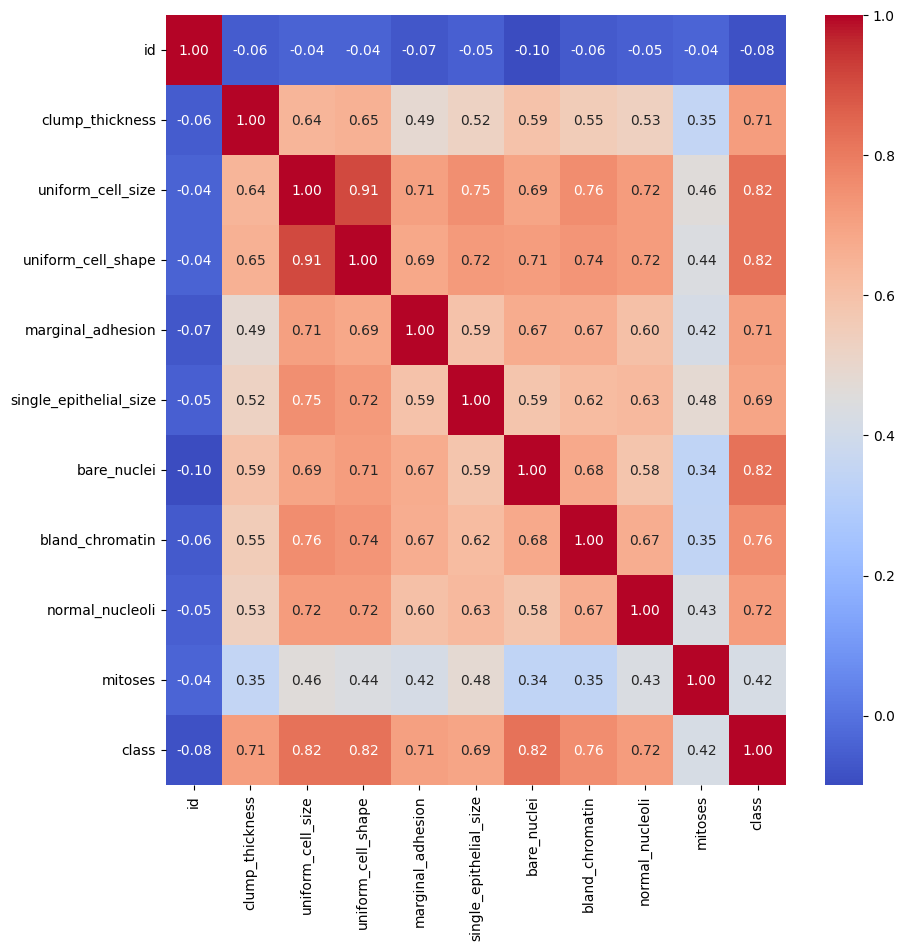

In [90]:
#used a matrix instead of a scatterplot for more concise interperation @

#alos added a heat map for easier viewing
correlation_matrix = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


Visualize

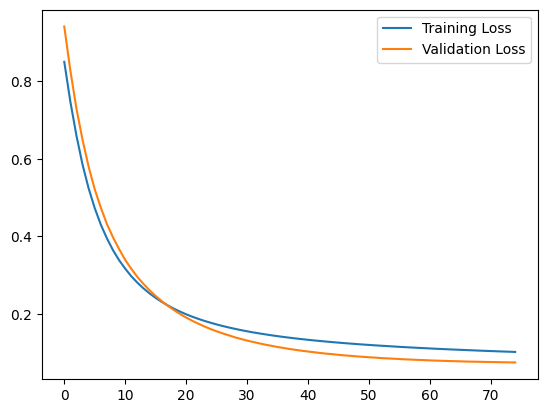

In [91]:
#plot the training progress
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

Confusion

In [92]:
#pritn the confusion matrix, accurcy, precision, recall and f1 score
#redicted probabilities
y_prob = model.predict(X_test)

#Convert to class labels
y_pred = (y_prob > 0.5).astype(int).flatten()


conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')


3/3 [==============================] - 0s 4ms/step
Confusion Matrix:
[[39  0]
 [ 1 29]]
Accuracy: 0.9855072463768116
Precision: 1.0
Recall: 0.9666666666666667
F1 Score: 0.983050847457627


Parameter count

In [95]:
# '#' of parameters
params_count = model.count_params()
print(f'number of parameters: {params_count}')


number of parameters: 10
